In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

НЕЛІНІЙНА РЕГРЕСІЯ

In [2]:
X = np.array([2.01, 1.93, 2.16, 1.84, 2.34, 2.07, 2.20, 2.04, 2.03, 1.72, 2.35, 2.27, 2.18, 1.94, 1.64])
Y = np.array([7.25, 8.03, 7.46, 10.03, 6.35, 6.95, 6.34, 6.58, 7.58, 9.56, 6.22, 6.93, 7.22, 8.83, 9.05])

In [3]:
n = len(X)
n

15

Точкові статистичні оцінки для параметрів

In [4]:
Z = 1/X
Z

array([0.49751244, 0.51813472, 0.46296296, 0.54347826, 0.42735043,
       0.48309179, 0.45454545, 0.49019608, 0.49261084, 0.58139535,
       0.42553191, 0.44052863, 0.4587156 , 0.51546392, 0.6097561 ])

In [5]:
Z_biased = np.column_stack((np.ones_like(Z), Z))
Z_biased

array([[1.        , 0.49751244],
       [1.        , 0.51813472],
       [1.        , 0.46296296],
       [1.        , 0.54347826],
       [1.        , 0.42735043],
       [1.        , 0.48309179],
       [1.        , 0.45454545],
       [1.        , 0.49019608],
       [1.        , 0.49261084],
       [1.        , 0.58139535],
       [1.        , 0.42553191],
       [1.        , 0.44052863],
       [1.        , 0.4587156 ],
       [1.        , 0.51546392],
       [1.        , 0.6097561 ]])

In [6]:
B = np.linalg.inv(Z_biased.T @ Z_biased) @ Z_biased.T @ Y
b0, b1 = B
print(f'b0 = {b0:.4f}, b1 = {b1:.4f}')

b0 = -1.9833, b1 = 19.4736


In [7]:
print(f'y = {b0:.4f} + {b1:.4f}/x')

y = -1.9833 + 19.4736/x


In [8]:
Y_pred = b0 + b1*Z
Y_pred

array([7.70506106, 8.10665145, 7.0322577 , 8.60018205, 6.3387527 ,
       7.42423878, 6.86833833, 7.56258505, 7.60960915, 9.33856502,
       6.30333968, 6.5953801 , 6.94954609, 8.05464136, 9.89085148])

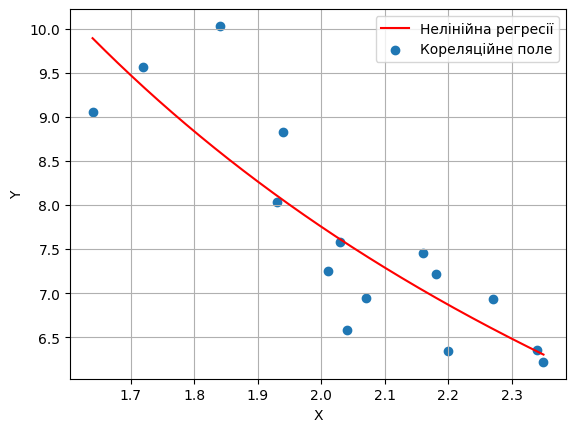

In [9]:
X_grid = np.linspace(min(X), max(X), 500)
Z_grid = 1 / X_grid
Y_grid = b0 + b1 * Z_grid

plt.plot(X_grid, Y_grid, color='r', label='Нелінійна регресії')
plt.scatter(X, Y, label='Кореляційне поле')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Побудувати довірчий інтервал

In [10]:
y = 0.99
alpha = 1 - y
k = 2

In [11]:
Y_hat = Z_biased @ B
Y_hat

array([7.70506106, 8.10665145, 7.0322577 , 8.60018205, 6.3387527 ,
       7.42423878, 6.86833833, 7.56258505, 7.60960915, 9.33856502,
       6.30333968, 6.5953801 , 6.94954609, 8.05464136, 9.89085148])

In [12]:
e = Y - Y_hat
e

array([-0.45506106, -0.07665145,  0.4277423 ,  1.42981795,  0.0112473 ,
       -0.47423878, -0.52833833, -0.98258505, -0.02960915,  0.22143498,
       -0.08333968,  0.3346199 ,  0.27045391,  0.77535864, -0.84085148])

In [13]:
S_2 = np.sum(e**2) / (n-k)
print(S_2)

0.4200097118277949


In [14]:
S = np.sqrt(S_2)
print(S)

0.6480815626352866


In [15]:
XtX_inv = np.linalg.inv(Z_biased.T @ Z_biased)
XtX_inv

array([[  6.08913808, -12.2056102 ],
       [-12.2056102 ,  24.73684143]])

In [16]:
t_crit = stats.t.ppf(y, df=n-k)
print(f't крит. = {t_crit:.4f}')

t крит. = 2.6503


In [17]:
for i in range(n):
    x_0 = Z_biased[i]
    margin = t_crit * np.sqrt(S_2 * (x_0 @ XtX_inv @ x_0.T))
    
    low, high = Y_hat[i] - margin, Y_hat[i] + margin
    
    print(f"x = {X[i]:.2f}, 1/x = {Z[i]:.4f}")
    print(f"({low:.2f}; {high:.2f})")
    print()

x = 2.01, 1/x = 0.4975
(7.26; 8.15)

x = 1.93, 1/x = 0.5181
(7.62; 8.60)

x = 2.16, 1/x = 0.4630
(6.52; 7.55)

x = 1.84, 1/x = 0.5435
(7.98; 9.22)

x = 2.34, 1/x = 0.4274
(5.62; 7.06)

x = 2.07, 1/x = 0.4831
(6.97; 7.88)

x = 2.20, 1/x = 0.4545
(6.31; 7.42)

x = 2.04, 1/x = 0.4902
(7.12; 8.01)

x = 2.03, 1/x = 0.4926
(7.17; 8.05)

x = 1.72, 1/x = 0.5814
(8.47; 10.21)

x = 2.35, 1/x = 0.4255
(5.57; 7.03)

x = 2.27, 1/x = 0.4405
(5.96; 7.23)

x = 2.18, 1/x = 0.4587
(6.42; 7.48)

x = 1.94, 1/x = 0.5155
(7.57; 8.54)

x = 1.64, 1/x = 0.6098
(8.80; 10.98)



Обчислити коефіцієнт множинної кореляції

In [18]:
S_total = np.sum((Y - np.mean(Y))**2)
print(S_total)

20.79037333333334


In [19]:
S_res = np.sum((Y - Y_hat)**2)
print(S_res)

5.4601262537613335


In [20]:
R_2 = 1 - S_res / S_total
print(R_2)

0.7373723806581636


In [21]:
R = np.sqrt(R_2)
print(R)

0.8587038957977096
